# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# read in the csv file 
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# save the image predictions file and read it in 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# set up the twitter api 
consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# read in and save the tweets 
with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive["tweet_id"].values:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue

In [4]:
# read in the .txt file line for line, save it and convert it to a Dataframe
twitter_list = []

for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count']})

twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
twitter_data.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [8]:
twitter_archive["name"].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
an            7
Buddy         7
Daisy         7
Toby          7
Bailey        7
Bella         6
Jax           6
Dave          6
Oscar         6
Rusty         6
Koda          6
Leo           6
Scout         6
Milo          6
Jack          6
Stanley       6
Gus           5
           ... 
Butters       1
Winifred      1
Clifford      1
Tobi          1
Eazy          1
Stark         1
Derby         1
Milky         1
Cora          1
Brian         1
Andy          1
Cal           1
Shikha        1
Sailor        1
Holly         1
Mookie        1
Ashleigh      1
Blue          1
Colin         1
Sage          1
Dunkin        1
Kawhi         1
Brady         1
Lucky         1
Ole           1
Jay           1
Pupcasso      1
Harry         1
Zara          1
Gòrdón        1
Name: name, Length: 957,

In [9]:
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [10]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [12]:
twitter_data.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [13]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [14]:
twitter_data.describe()

retweet_count  favorite_count
count    2354.000000     2354.000000
mean     3164.797366     8080.968564
std      5284.770364    11814.771334
min         0.000000        0.000000
25%       624.500000     1415.000000
50%      1473.500000     3603.500000
75%      3652.000000    10122.250000
max     79515.000000   132810.000000

## Quality issues

#### Twitter Archive
- Max rating_numerator is 1776 (outlier probably)
- Max rating_denominator is 170 (out of 10)
- Missing values in expanded_urls
- timestamp has the wrong data type (object, should be datetime)  
- Keep only original ratings (no retweets) that have images
- Missing or "a" in the name column

#### Image Prediction
- Erroneous datatype (tweet_id)
- Not the same size as the twitter archive data (2075 vs. 2365)


#### Twitter Data (API)
- Erroneous datatype (tweet_id)
- Not the same size as the twitter archive data (2354 vs. 2365)

## Tidiness issues
#### Twitter Archive
- doggo, floofer, pupper, puppo should be merged into one column 
- drop columns that are not needed: ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]

#### Image Prediction
- merge with twitter archive data on "tweet_id" column 

#### Twitter Data (API)
- merge with twitter archive data on "tweet_id" column 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [76]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
twitter_data_clean = twitter_data.copy()

### Issue #1: drop columns that are not needed: ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]

#### Define: drop columns in the twitter_archive data using .drop

#### Code

In [77]:
# drop not used columns
twitter_archive_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)

#### Test

In [78]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #2: Keep only original ratings (no retweets) that have images / Missing values in expanded_urls

#### Define: Check for duplicates and images in the twitter_archive data 

#### Code

In [79]:
# seems like there are no duplicates 
twitter_archive_clean.duplicated().any()

False

In [80]:
# drop columns with missing "expanded_urls"
cols_to_drop = twitter_archive_clean[twitter_archive_clean["expanded_urls"].isna()]
twitter_archive_clean.drop(cols_to_drop.index, inplace=True)

#### Test

In [81]:
# seems like there are no more missing values
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


### Issue 3: timestamp has the wrong data type (object, should be datetime)

#### Define: change data type with to_datetime

#### Code

In [82]:
# change the data type to datetime
twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean["timestamp"])

#### Test

In [83]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 233.3+ KB


### Issue 4: Max rating_denominator is 170 (out of 10)

#### Define: Change every value to a "10"

#### Code

In [84]:
# change all values that are not 10 to 10
twitter_archive_clean.loc[twitter_archive_clean["rating_denominator"] != 10, "rating_denominator"] = 10

#### Test

In [85]:
twitter_archive_clean["rating_denominator"].value_counts()

10    2297
Name: rating_denominator, dtype: int64

In [86]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 233.3+ KB


### Issue 5: Max rating_numerator is 1776 (outlier probably)

#### Define: Drop all values that are larger than 14

#### Code

In [87]:
# create a subset with rating numerators above 14
cols_to_drop = twitter_archive_clean[twitter_archive_clean["rating_numerator"] > 14]
twitter_archive_clean.drop(cols_to_drop.index, inplace=True)

#### Test

In [88]:
twitter_archive_clean["rating_numerator"].value_counts()

12    547
11    455
10    455
13    339
9     156
8     102
7      53
14     50
5      35
6      32
3      19
4      16
2       9
1       6
0       2
Name: rating_numerator, dtype: int64

### Issue 6: Missing or "a" in the name column

#### Define: drop all columns with missing or "a" names

#### Code

In [89]:
# drop all dogs that are named "a"
cols_to_drop = twitter_archive_clean[twitter_archive_clean["name"] == "a"]
twitter_archive_clean.drop(cols_to_drop.index, inplace=True)

In [90]:
# drop all columns that have "None" name
cols_to_drop = twitter_archive_clean[twitter_archive_clean["name"] == "None"]
twitter_archive_clean.drop(cols_to_drop.index, inplace=True)

#### Test

In [91]:
twitter_archive_clean["name"].isna().sum();

In [92]:
twitter_archive_clean["name"].value_counts();

In [93]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 2349
Data columns (total 12 columns):
tweet_id              1549 non-null int64
timestamp             1549 non-null datetime64[ns]
source                1549 non-null object
text                  1549 non-null object
expanded_urls         1549 non-null object
rating_numerator      1549 non-null int64
rating_denominator    1549 non-null int64
name                  1549 non-null object
doggo                 1549 non-null object
floofer               1549 non-null object
pupper                1549 non-null object
puppo                 1549 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 157.3+ KB


### Issue 7: doggo, floofer, pupper, puppo should be merged into one column

#### Define: Melt the doggo. floofer, pupper, puppo into a dog_stages column

#### Code

In [94]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [95]:
# melt the various "dog" categories into one column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'], value_name="dog_stages")

In [96]:
twitter_archive_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name variable dog_stages  
0                  10   Phineas    doggo       None  
1                  10     Tilly    doggo       None  
2                  10    Archie    doggo       None  
3                  10     Darla    doggo       None  
4                  10  Franklin    doggo       None

In [98]:
twitter_archive_clean["dog_stages"].value_counts()

None       5975
pupper      143
doggo        53
puppo        20
floofer       5
Name: dog_stages, dtype: int64

In [99]:
twitter_archive_clean.drop("variable", axis=1, inplace=True)

#### Test

In [100]:
# columns look good
twitter_archive_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  
0                  10   Phineas       None  
1                  10     Tilly       None  
2                  10    Archie       None  
3                  10     Darla       None  
4                  10  Franklin       None

In [101]:
# too many values in here, melting seems to have duplicated the rows
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6196 entries, 0 to 6195
Data columns (total 9 columns):
tweet_id              6196 non-null int64
timestamp             6196 non-null datetime64[ns]
source                6196 non-null object
text                  6196 non-null object
expanded_urls         6196 non-null object
rating_numerator      6196 non-null int64
rating_denominator    6196 non-null int64
name                  6196 non-null object
dog_stages            6196 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 435.7+ KB


In [103]:
# There are a lot of duplicated values now, so we need to drop them 
twitter_archive_clean.duplicated().sum()

4426

In [104]:
twitter_archive_clean.drop_duplicates(inplace=True)

In [105]:
twitter_archive_clean.duplicated().sum()

0

In [106]:
# looks like dropping the duplicates worked
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 5421
Data columns (total 9 columns):
tweet_id              1770 non-null int64
timestamp             1770 non-null datetime64[ns]
source                1770 non-null object
text                  1770 non-null object
expanded_urls         1770 non-null object
rating_numerator      1770 non-null int64
rating_denominator    1770 non-null int64
name                  1770 non-null object
dog_stages            1770 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 138.3+ KB


### Issue 8: Clean API and prediction data

#### Define: Check for missing values, fill them if any and check for duplicates and drop them if any 

#### Code

In [107]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [108]:
# seems good
twitter_data_clean.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [109]:
# seems like the tweet_id column is of type object, we need to change it to int to merge later 
twitter_data_clean["tweet_id"] = twitter_data_clean["tweet_id"].astype(int)

In [110]:
# seems good
twitter_data_clean.duplicated().sum()

0

In [111]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [112]:
# looks good
image_prediction_clean.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [114]:
# looks good
image_prediction_clean.duplicated().sum()

0

#### Test

In [115]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [116]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue 9: merge with twitter archive data on "tweet_id" column

#### Define: use merge to join the different tables together

#### Code

In [117]:
# merge the archive and the prediction data tables on tweet id
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean, on=["tweet_id"], how="left")

In [118]:
# merge the archive and the api data tables on tweet id
twitter_archive_clean = pd.merge(twitter_archive_clean, twitter_data_clean, on=["tweet_id"], how="left")

In [119]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 1769
Data columns (total 22 columns):
tweet_id              1770 non-null int64
timestamp             1770 non-null datetime64[ns]
source                1770 non-null object
text                  1770 non-null object
expanded_urls         1770 non-null object
rating_numerator      1770 non-null int64
rating_denominator    1770 non-null int64
name                  1770 non-null object
dog_stages            1770 non-null object
jpg_url               1634 non-null object
img_num               1634 non-null float64
p1                    1634 non-null object
p1_conf               1634 non-null float64
p1_dog                1634 non-null object
p2                    1634 non-null object
p2_conf               1634 non-null float64
p2_dog                1634 non-null object
p3                    1634 non-null object
p3_conf               1634 non-null float64
p3_dog                1634 non-null object
retweet_count         17

In [120]:
# check for duplicates
twitter_archive_clean.duplicated().sum()

0

In [121]:
# check for missing values
twitter_archive_clean.isna().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls           0
rating_numerator        0
rating_denominator      0
name                    0
dog_stages              0
jpg_url               136
img_num               136
p1                    136
p1_conf               136
p1_dog                136
p2                    136
p2_conf               136
p2_dog                136
p3                    136
p3_conf               136
p3_dog                136
retweet_count           1
favorite_count          1
dtype: int64

In [122]:
# drop missing values
twitter_archive_clean.dropna(inplace=True)

#### Test

In [124]:
twitter_archive_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  \
0                  10   Phineas       None   
1                  10     Tilly       None   
2                  10    Archie       None   
3                  10     Darla       None   
4                  10  Franklin       None   

                                           jpg_url      ...         p1_conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      ...        0.097049   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      ...        0.323581   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      ...        0.716012   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      ...        0.170278   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      ...        0.555712   

  p1_dog                  p2   p2_conf p2_dog                           p3  \
0  False               bagel  0.085851  False                       banana   
1   True            Pekinese  0.090647   True                     papillon   
2   True            malamute  0.078253   True                       kelpie   
3  False  Labrador_retriever  0.168086   True                      spatula   
4   True    English_springer  0.225770   True  German_short-haired_pointer   

    p3_conf p3_dog  retweet_count favorite_count  
0  0.076110  False         8853.0        39467.0  
1  0.068957   True         6514.0        33819.0  
2  0.031379   True         4328.0        25461.0  
3  0.040836  False         8964.0        42908.0  
4  0.175219   True         9774.0        41048.0  

[5 rows x 22 columns]

In [125]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633 entries, 0 to 1769
Data columns (total 22 columns):
tweet_id              1633 non-null int64
timestamp             1633 non-null datetime64[ns]
source                1633 non-null object
text                  1633 non-null object
expanded_urls         1633 non-null object
rating_numerator      1633 non-null int64
rating_denominator    1633 non-null int64
name                  1633 non-null object
dog_stages            1633 non-null object
jpg_url               1633 non-null object
img_num               1633 non-null float64
p1                    1633 non-null object
p1_conf               1633 non-null float64
p1_dog                1633 non-null object
p2                    1633 non-null object
p2_conf               1633 non-null float64
p2_dog                1633 non-null object
p3                    1633 non-null object
p3_conf               1633 non-null float64
p3_dog                1633 non-null object
retweet_count         16

In [127]:
twitter_archive_clean.duplicated().sum()

0

In [128]:
# looks clean
twitter_archive_clean.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
dog_stages            0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
retweet_count         0
favorite_count        0
dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [129]:
# save as a master csv
twitter_archive_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [4]:
df = pd.read_csv("twitter_archive_master.csv")
df.head()

tweet_id            timestamp  \
0  892420643555336193  2017-08-01 16:23:56   
1  892177421306343426  2017-08-01 00:17:27   
2  891815181378084864  2017-07-31 00:18:03   
3  891689557279858688  2017-07-30 15:58:51   
4  891327558926688256  2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  \
0                  10   Phineas       None   
1                  10     Tilly       None   
2                  10    Archie       None   
3                  10     Darla       None   
4                  10  Franklin       None   

                                           jpg_url       ...         p1_conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg       ...        0.097049   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg       ...        0.323581   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg       ...        0.716012   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg       ...        0.170278   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg       ...        0.555712   

  p1_dog                  p2   p2_conf p2_dog                           p3  \
0  False               bagel  0.085851  False                       banana   
1   True            Pekinese  0.090647   True                     papillon   
2   True            malamute  0.078253   True                       kelpie   
3  False  Labrador_retriever  0.168086   True                      spatula   
4   True    English_springer  0.225770   True  German_short-haired_pointer   

    p3_conf p3_dog  retweet_count  favorite_count  
0  0.076110  False         8853.0         39467.0  
1  0.068957   True         6514.0         33819.0  
2  0.031379   True         4328.0         25461.0  
3  0.040836  False         8964.0         42908.0  
4  0.175219   True         9774.0         41048.0  

[5 rows x 22 columns]

In [9]:
df["rating_numerator"].sort_values(ascending=False)

212     14
311     14
79      14
132     14
399     14
268     14
1509    14
1435    14
118     14
129     14
18      14
1501    14
54      14
84      14
229     14
281     14
280     14
279     14
278     14
1506    14
7       14
1445    14
1456    14
67      14
1477    14
340     14
1460    14
1459    14
1458    14
1457    14
        ..
1317     5
1179     5
1151     5
1367     5
1121     5
1085     5
1131     5
1017     5
1066     4
573      4
832      4
781      4
1022     4
1351     3
1162     3
840      3
936      3
1005     3
1556     3
895      3
1059     3
487      3
762      3
1319     3
1429     2
1175     2
1107     2
1390     2
1434     2
1431     1
Name: rating_numerator, Length: 1633, dtype: int64

In [3]:
# take a look at some statistics
df.describe()

tweet_id  rating_numerator  rating_denominator      img_num  \
count  1.633000e+03       1633.000000              1633.0  1633.000000   
mean   7.467246e+17         10.748928                10.0     1.219228   
std    6.843823e+16          1.928098                 0.0     0.591772   
min    6.660519e+17          1.000000                10.0     1.000000   
25%    6.812817e+17         10.000000                10.0     1.000000   
50%    7.327322e+17         11.000000                10.0     1.000000   
75%    8.047388e+17         12.000000                10.0     1.000000   
max    8.924206e+17         14.000000                10.0     4.000000   

           p1_conf       p2_conf       p3_conf  retweet_count  favorite_count  
count  1633.000000  1.633000e+03  1.633000e+03    1633.000000     1633.000000  
mean      0.603600  1.343177e-01  5.957588e-02    3046.454378     9184.990202  
std       0.272682  1.018411e-01  5.113690e-02    4605.672763    11856.877120  
min       0.044333  1.011300e-08  1.740170e-10      23.000000        0.000000  
25%       0.370717  5.133470e-02  1.524340e-02     759.000000     2187.000000  
50%       0.605851  1.170030e-01  4.846400e-02    1673.000000     4639.000000  
75%       0.861651  1.983580e-01  9.219820e-02    3636.000000    11925.000000  
max       1.000000  4.880140e-01  2.710420e-01   56625.000000   107956.000000

In [11]:
# Looking at the favorite count column to find the tweet with the highest upvote count
df.sort_values(by="favorite_count", ascending=False)

tweet_id            timestamp  \
48    879415818425184262  2017-06-26 19:07:24   
341   807106840509214720  2016-12-09 06:17:20   
1494  866450705531457537  2017-05-22 00:28:40   
89    866450705531457537  2017-05-22 00:28:40   
1460  819004803107983360  2017-01-11 02:15:36   
281   819004803107983360  2017-01-11 02:15:36   
77    870374049280663552  2017-06-01 20:18:38   
110   859196978902773760  2017-05-02 00:04:57   
219   830583320585068544  2017-02-12 01:04:29   
55    877736472329191424  2017-06-22 03:54:17   
19    887473957103951883  2017-07-19 00:47:34   
28    884925521741709313  2017-07-12 00:01:00   
1136  676219687039057920  2015-12-14 01:58:31   
226   829011960981237760  2017-02-07 17:00:28   
288   817827839487737858  2017-01-07 20:18:46   
84    868880397819494401  2017-05-28 17:23:24   
90    866334964761202691  2017-05-21 16:48:45   
41    881666595344535552  2017-07-03 00:11:11   
280   819006400881917954  2017-01-11 02:21:57   
1459  819006400881917954  2017-01-11 02:21:57   
355   804026241225523202  2016-11-30 18:16:08   
1413  667152164079423490  2015-11-19 01:27:25   
148   846514051647705089  2017-03-28 00:07:32   
1441  846514051647705089  2017-03-28 00:07:32   
18    887517139158093824  2017-07-19 03:39:09   
33    883482846933004288  2017-07-08 00:28:19   
38    882268110199369728  2017-07-04 16:01:23   
80    869772420881756160  2017-05-31 04:27:59   
3     891689557279858688  2017-07-30 15:58:51   
54    878057613040115712  2017-06-23 01:10:23   
...                  ...                  ...   
347   805958939288408065  2016-12-06 02:15:59   
389   796177847564038144  2016-11-09 02:29:25   
382   798340744599797760  2016-11-15 01:44:00   
354   804413760345620481  2016-12-01 19:56:00   
369   800443802682937345  2016-11-20 21:00:48   
372   799774291445383169  2016-11-19 00:40:24   
1516  770093767776997377  2016-08-29 03:00:36   
379   798697898615730177  2016-11-16 01:23:12   
447   786036967502913536  2016-10-12 02:53:11   
462   783347506784731136  2016-10-04 16:46:14   
301   816014286006976512  2017-01-02 20:12:21   
1502  818588835076603904  2017-01-09 22:42:41   
279   819015331746349057  2017-01-11 02:57:26   
1449  829878982036299777  2017-02-10 02:25:42   
380   798665375516884993  2016-11-15 23:13:58   
1458  819015331746349057  2017-01-11 02:57:26   
597   754874841593970688  2016-07-18 03:06:01   
588   757729163776290825  2016-07-26 00:08:05   
1473  770093767776997377  2016-08-29 03:00:36   
545   766078092750233600  2016-08-18 01:03:45   
284   818588835076603904  2017-01-09 22:42:41   
526   770093767776997377  2016-08-29 03:00:36   
518   771171053431250945  2016-09-01 02:21:21   
510   772615324260794368  2016-09-05 02:00:22   
295   816829038950027264  2017-01-05 02:09:53   
488   777641927919427584  2016-09-18 22:54:18   
484   778396591732486144  2016-09-21 00:53:04   
476   780496263422808064  2016-09-26 19:56:24   
470   782021823840026624  2016-10-01 00:58:26   
1508  800443802682937345  2016-11-20 21:00:48   

                                                 source  \
48    <a href="http://twitter.com/download/iphone" r...   
341   <a href="http://twitter.com/download/iphone" r...   
1494  <a href="http://twitter.com/download/iphone" r...   
89    <a href="http://twitter.com/download/iphone" r...   
1460  <a href="http://twitter.com/download/iphone" r...   
281   <a href="http://twitter.com/download/iphone" r...   
77    <a href="http://twitter.com/download/iphone" r...   
110   <a href="http://twitter.com/download/iphone" r...   
219   <a href="http://twitter.com/download/iphone" r...   
55    <a href="http://twitter.com/download/iphone" r...   
19    <a href="http://twitter.com/download/iphone" r...   
28    <a href="http://twitter.com/download/iphone" r...   
1136  <a href="http://twitter.com/download/iphone" r...   
226   <a href="http://twitter.com/download/iphone" r...   
288   <a href="http://twitter.com/download/iphone" r...   
84    <a href="http://twitter.com

In [7]:
# check for popular dog names
names = df["name"].value_counts()[:7].sort_values(ascending=False)
names

Cooper     13
Charlie    12
Oliver     12
Bo         11
Lucy       11
Penny      10
Tucker     10
Name: name, dtype: int64

### Insights:
- The mean rating_numerator of my cleaned dataset has a value of 10.748, meaning the average dog has a higher rating than the rating_denominator that is 10.

- The tweet with the highest favorite_count has a value of "107956" upvotes and the dog is named "Duddles".

- The most popular dog name is Cooper, followed by Charlie and Oliver. 

### Visualization

In [15]:
from matplotlib.pyplot import figure

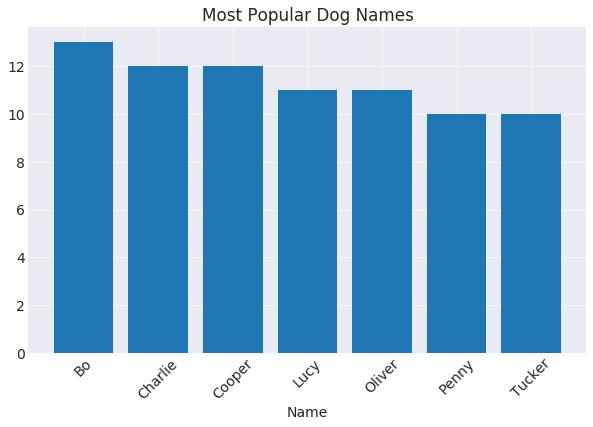

In [34]:
# set fig and font size
figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})

# bar plot the names variable which includes the most popular dog names
plt.bar(names.index.sort_values(), names)
plt.title("Most Popular Dog Names")
plt.xlabel("Name")
plt.xticks(rotation = 45)
plt.show()